In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

import EDA_functions as func

In [2]:
site = "D"

In [3]:
# load the data
# get parent directory
os.chdir("..")
data_directory = 'Data'

data_name = site + "_TurbineData.csv"
flag_name = site + "_FullPerformanceFlag.csv"

# read the data
data = pd.read_csv(os.path.join(os.getcwd(), data_directory, data_name))
flag = pd.read_csv(os.path.join(os.getcwd(), data_directory, flag_name))

# reset to current directory
fd = sys.path[0]
os.chdir(fd)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843280 entries, 0 to 843279
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     843280 non-null  int64  
 1   ts                             843280 non-null  object 
 2   instanceID                     843280 non-null  object 
 3   AoARel                         832969 non-null  float64
 4   bladePitch                     832994 non-null  float64
 5   bladePitchMax                  832994 non-null  float64
 6   bladePitchMin                  832994 non-null  float64
 7   bladePitchSetPoint             0 non-null       float64
 8   bladePitchStd                  0 non-null       float64
 9   cP                             832969 non-null  float64
 10  generatorTorque                0 non-null       float64
 11  rotorTorque                    719304 non-null  float64
 12  TI                            

In [5]:
flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843280 entries, 0 to 843279
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  843280 non-null  int64 
 1   ts          843280 non-null  object
 2   instanceID  843280 non-null  object
 3   value       843280 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 25.7+ MB


In [6]:
# print the number of turbines and the turbine IDs
turbine_count = data['instanceID'].nunique()
turbine_name = data['instanceID'].unique()
print(turbine_count)
print(turbine_name)

16
['D_WTG01' 'D_WTG02' 'D_WTG03' 'D_WTG04' 'D_WTG05' 'D_WTG06' 'D_WTG07'
 'D_WTG08' 'D_WTG09' 'D_WTG10' 'D_WTG11' 'D_WTG12' 'D_WTG13' 'D_WTG14'
 'D_WTG15' 'D_WTG16']


In [7]:
# add the boolean flag signal to the data
data['value'] = flag['value']

# drop irrelevant columns
data = data.drop(columns = ['AoARel', 'bladePitch', 'bladePitchMax',
       'bladePitchMin', 'bladePitchSetPoint', 'bladePitchStd', 'cP',
       'generatorTorque', 'rotorTorque', 'TSR',
       'Wind_direction', 'Nacelle_position', 'Nacelle_temperature',
       'Rotor_speed', 'Power_Minimum', 'Power_Maximum', 'Generator_RPM', 'Generator_RPM_Max',
       'Generator_RPM_Min'])

In [8]:
# Add month, day, and hour
data['ts'] = pd.to_datetime(data['ts'], format = '%d-%b-%Y %H:%M:%S')
data['Month'] = data.ts.dt.month
data['Day'] = data.ts.dt.day
data['Hour'] = data.ts.dt.hour

In [9]:
data.columns.values

array(['Unnamed: 0', 'ts', 'instanceID', 'TI', 'Wind_speed', 'Power',
       'Ambient_temperature', 'Wind_speed_Standard_deviation', 'value',
       'Month', 'Day', 'Hour'], dtype=object)

In [10]:
# Rearrange columns
data = data.reindex(columns = ['ts',  'Month' , 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_Standard_deviation', 
                               'TI', 'Ambient_temperature', 'Power', 'value'])

# rename columns 
data.columns = ['ts',  'Month', 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_sd', 'TI', 
                'Temperature', 'Power', 'value']

In [11]:
data.sample(5, random_state = 10)

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
242476,2020-04-15 05:40:00,4,15,5,D_WTG13,3.627500,0.230475,6.353551,5.0,51.500000,1
839009,2020-12-30 03:40:00,12,30,3,D_WTG02,5.157368,0.520019,10.083023,0.0,203.894737,1
676679,2020-10-20 16:40:00,10,20,16,D_WTG08,5.806500,1.244658,21.435593,11.1,-5.350000,0
375728,2020-06-12 01:50:00,6,12,1,D_WTG01,9.084000,1.923799,21.177888,10.0,1194.050000,1
481109,2020-07-27 19:30:00,7,27,19,D_WTG06,14.638421,1.689728,11.543105,10.0,2294.052632,1


In [12]:
data.describe()

,Month,Day,Hour,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
count,843280.000000,843280.000000,843280.000000,832994.000000,832994.000000,832969.000000,832994.000000,832994.000000,843280.000000
mean,6.513557,15.756551,11.499782,7.219706,0.949165,14.291444,7.923094,590.141951,0.724139
std,3.451287,8.811686,6.922306,3.954232,0.598262,11.169864,4.529755,730.644773,0.446947
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-7.900000,-21.800000,0.000000
25%,4.000000,8.000000,5.000000,4.411579,0.498720,9.626370,4.600000,7.700000,0.000000
50%,7.000000,16.000000,11.000000,6.416316,0.803879,12.685316,7.894737,251.000000,1.000000
75%,10.000000,23.000000,17.000000,9.256625,1.275043,16.390993,11.000000,917.088158,1.000000
max,12.000000,31.000000,23.000000,28.621500,8.775345,394.376571,28.263158,2337.350000,1.000000


### Plot time series

In [13]:
# select one turbine
data_01 = data[data['instanceID'] == site + '_WTG01']

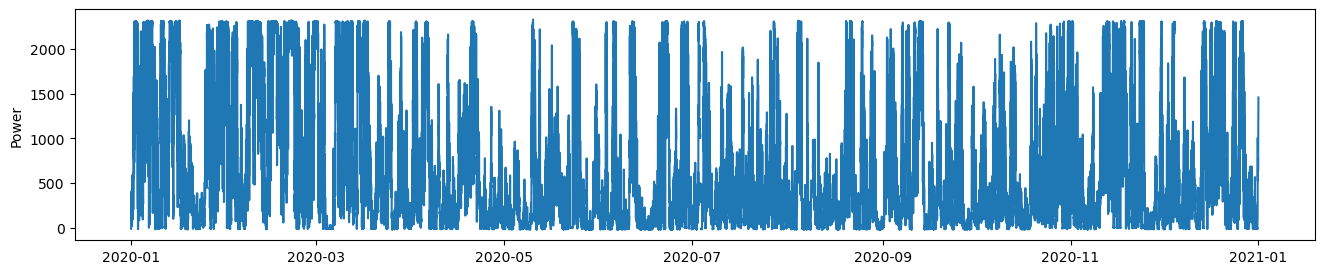

In [14]:
func.plot_timeseries(data_01, 'Power')

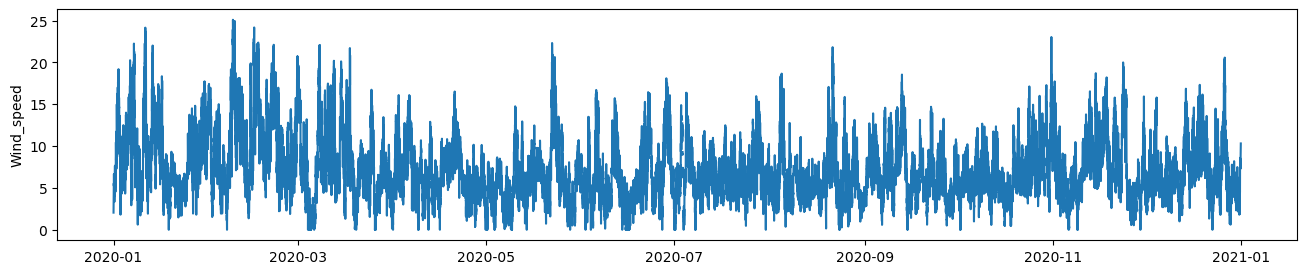

In [15]:
func.plot_timeseries(data_01, 'Wind_speed')

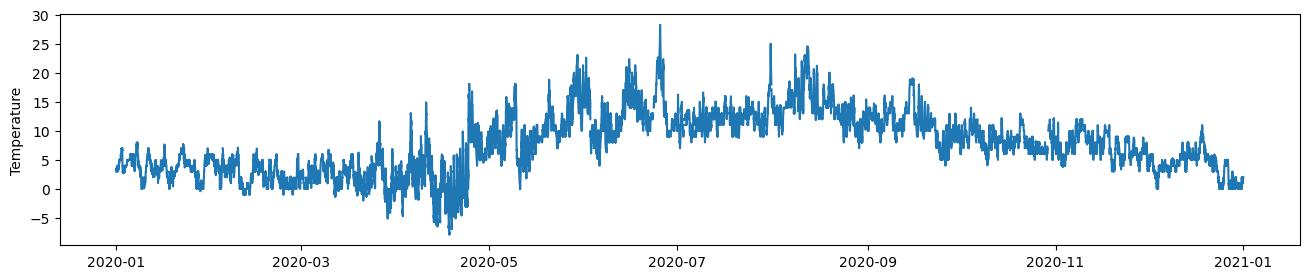

In [16]:
func.plot_timeseries(data_01, 'Temperature')

### Full performance data

In [17]:
# sort the turbine IDs and create a list of the IDs
instanceID = sorted(data.instanceID.unique().tolist())
ID = [instanceID[i][5:] for i in range (len(instanceID))] 

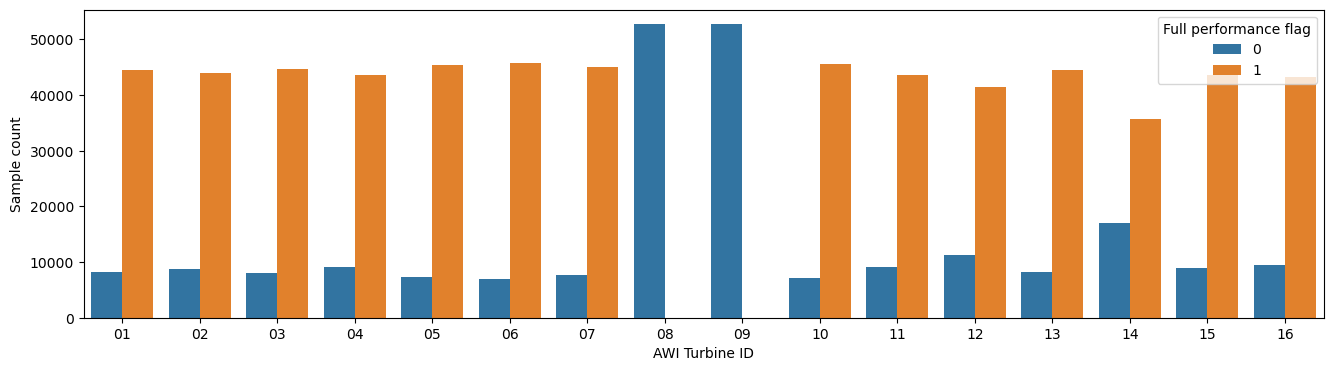

In [18]:
# Plot bar chart of full performance flag vs sample count for each turbine
bar = data.groupby(by=['instanceID','value']).count().reset_index()
func.plot_fullperformanceflag(df=bar, order=instanceID, ticklabels=ID, figsize = (16,4), orient = "v")

In [19]:
# only select rows with flag value = 1
data = data[data['value'] == 1]

# drop irrelevant columns 
data = data.drop(columns = ['value', 'Wind_speed_sd'])

In [20]:
# remove invalid values and null entries. 
# acceptable TI range: [0, 100]
# acceptable temperature range: [-5, 40]
data_clean = func.clean_data(data)
data_clean

,ts,Month,Day,Hour,instanceID,Wind_speed,TI,Temperature,Power
5,2020-01-01 00:00:00,1,1,0,D_WTG06,3.2985,9.261910,4.0,21.55
6,2020-01-01 00:00:00,1,1,0,D_WTG07,2.9335,16.053436,4.0,18.80
9,2020-01-01 00:00:00,1,1,0,D_WTG10,2.5060,17.063153,4.0,2.70
20,2020-01-01 00:10:00,1,1,0,D_WTG05,3.5740,9.022972,4.0,32.05
21,2020-01-01 00:10:00,1,1,0,D_WTG06,3.5935,9.450585,4.0,51.25
...,...,...,...,...,...,...,...,...,...
843275,2021-01-01 00:00:00,1,1,0,D_WTG12,8.5150,14.925741,2.0,897.95
843276,2021-01-01 00:00:00,1,1,0,D_WTG13,8.7210,12.503768,2.0,887.50
843277,2021-01-01 00:00:00,1,1,0,D_WTG14,5.5675,13.906435,2.0,352.35
843278,2021-01-01 00:00:00,1,1,0,D_WTG15,8.6745,5.889631,2.0,985.90


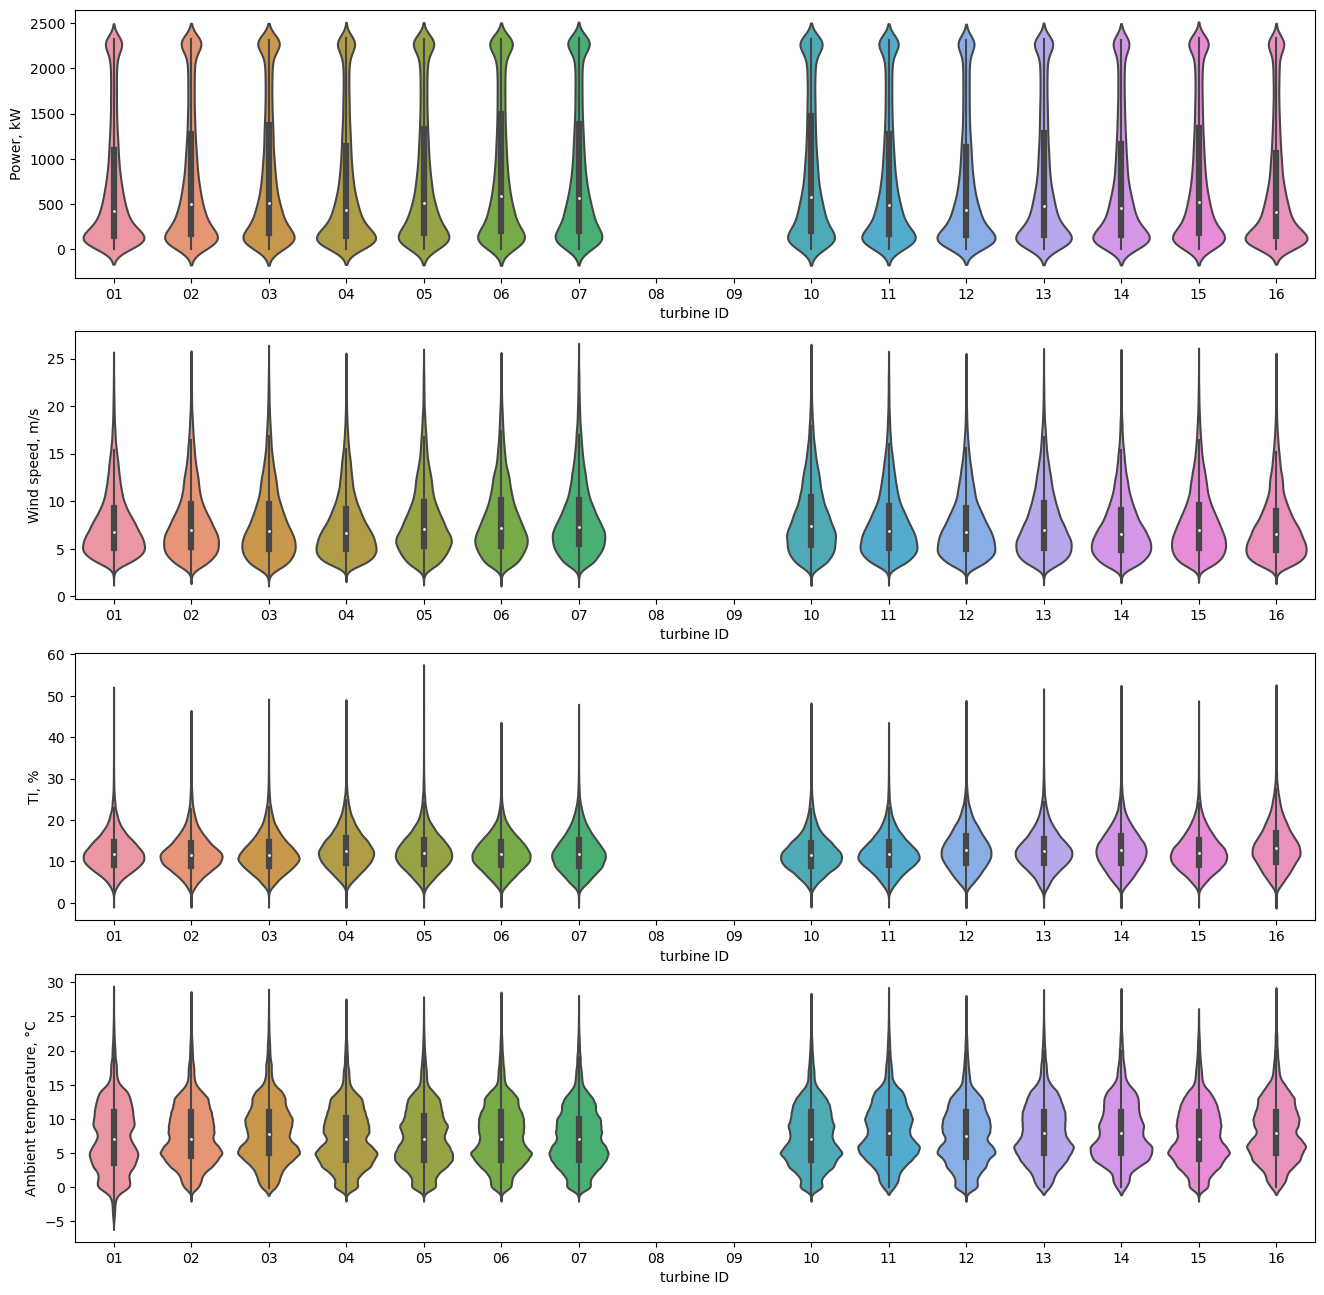

In [21]:
# Make violin plots of the variables 
var = [ 'Power','Wind_speed', 'TI','Temperature']
var_name = [ 'Power, kW','Wind speed, m/s', 'TI, %','Ambient temperature, °C']

func.plot_violinplot(df=data_clean, var=var, var_name=var_name, order=instanceID, 
                ticklabels=ID, figsize=(16, 16), orient = "v")

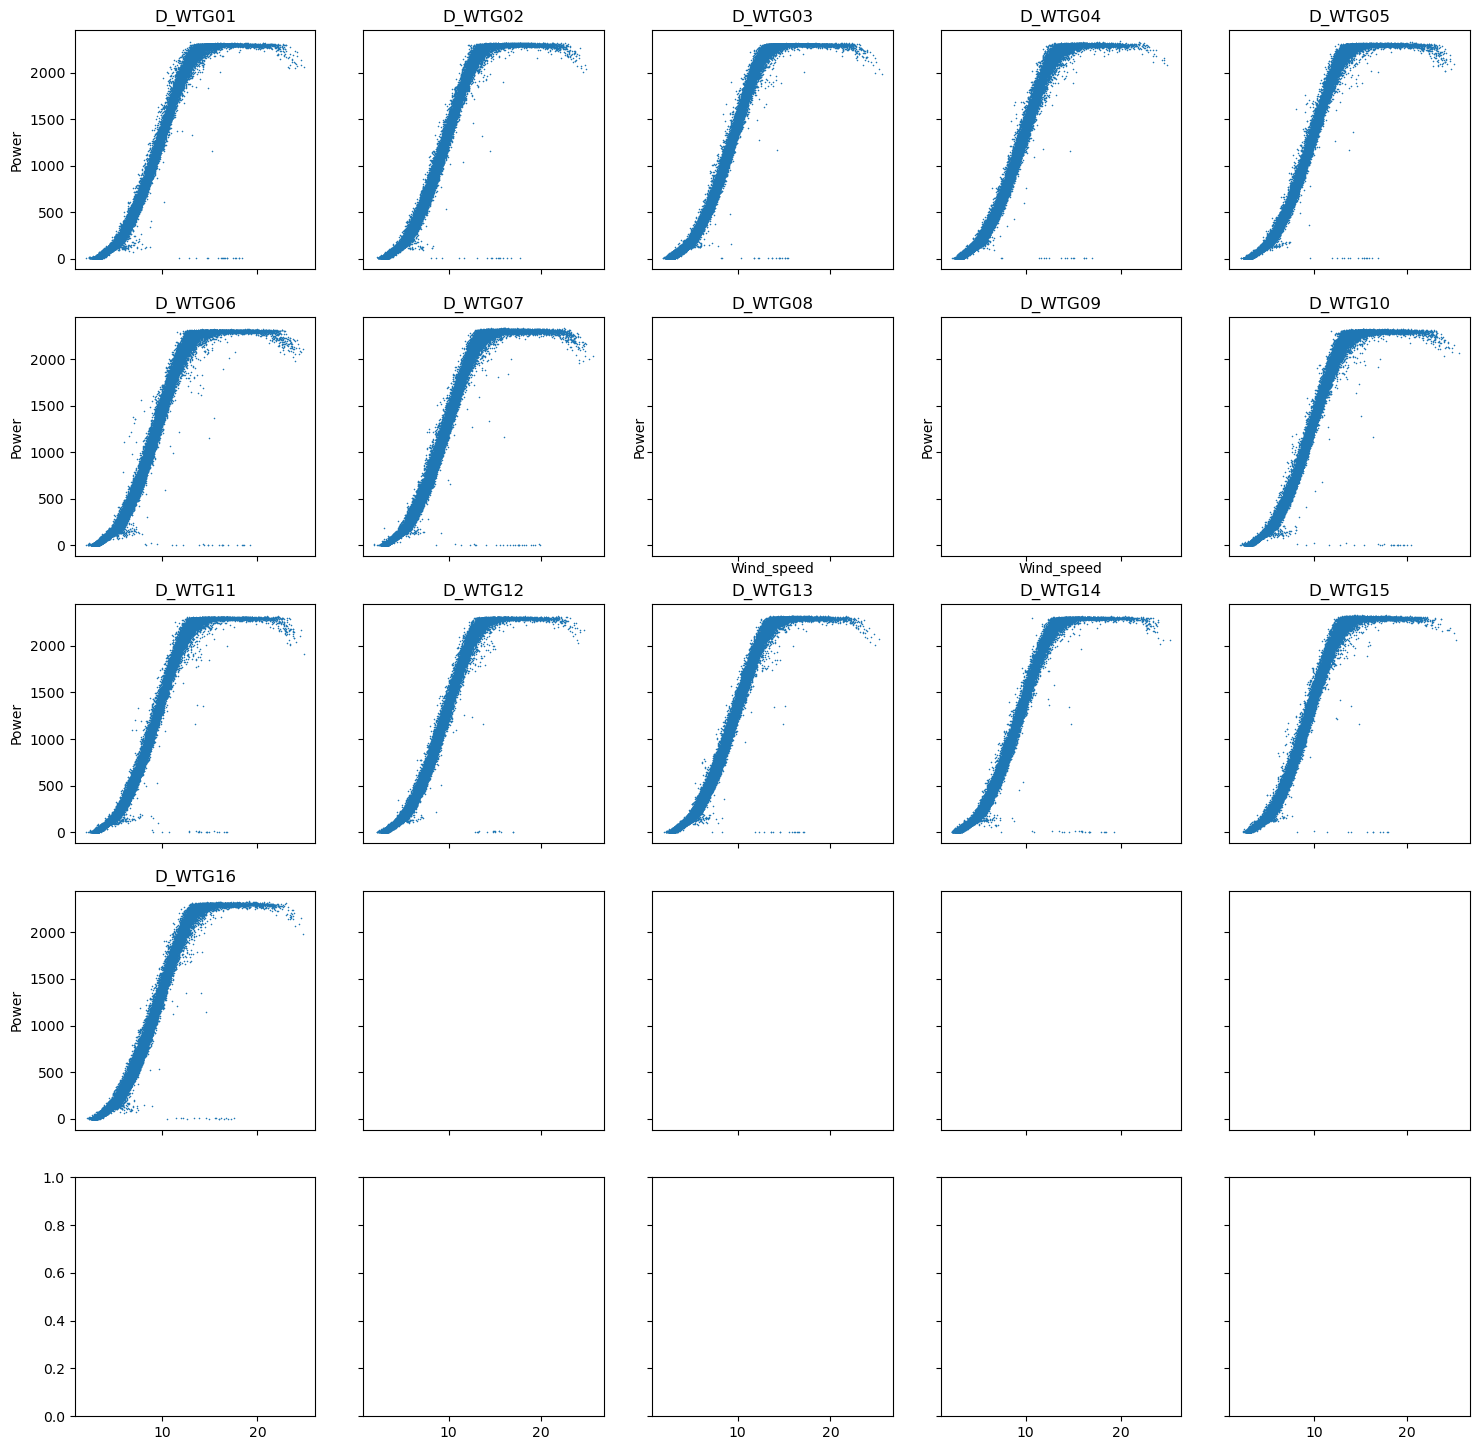

In [22]:
# Plot power curve for each turbine
func.plot_powercurve(df=data_clean, order=instanceID, figsize=(18,18))

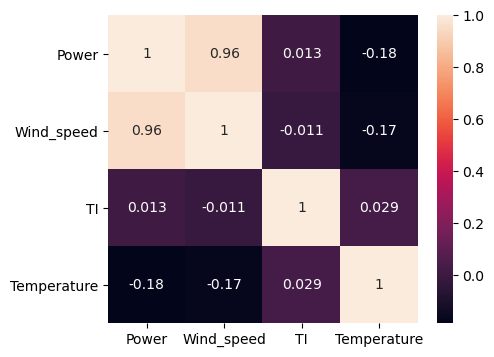

In [23]:
# Plot correlation between variables
plt.figure(figsize = (5,4))
sns.heatmap(data_clean[var].corr(), annot=True)
plt.show()

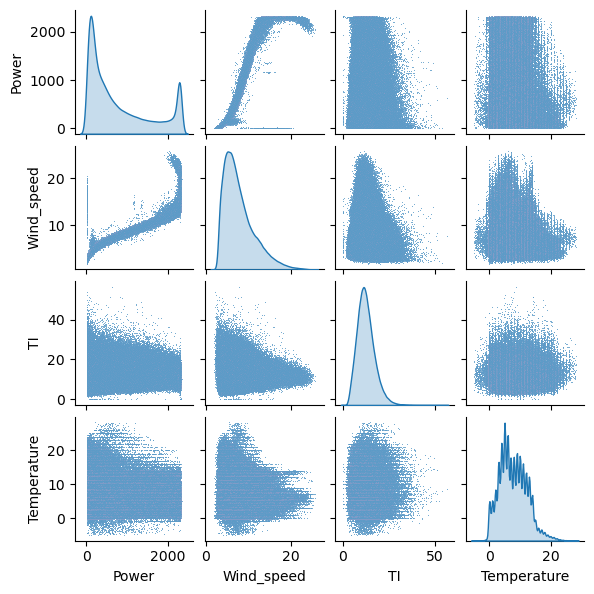

In [24]:
# Make pairplot of the variables
sns.pairplot(data_clean, vars = var, diag_kind = 'kde', plot_kws={'s' : 0.5}, height = 1.5)
plt.show()

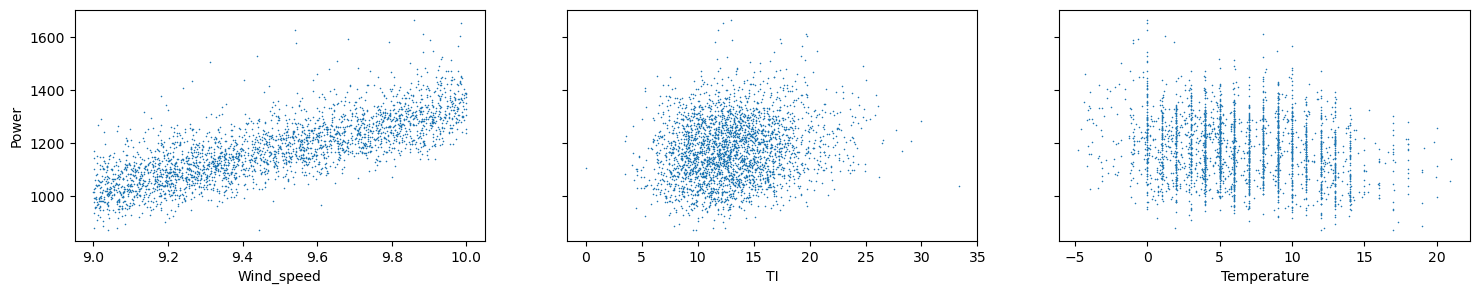

In [25]:
x_var = ["Wind_speed", "TI", "Temperature"]
func.plot_vars(df=data_clean, turbine_name= site + "_WTG01", ws_range=(9,10), x_var = x_var, figsize=(18,3))

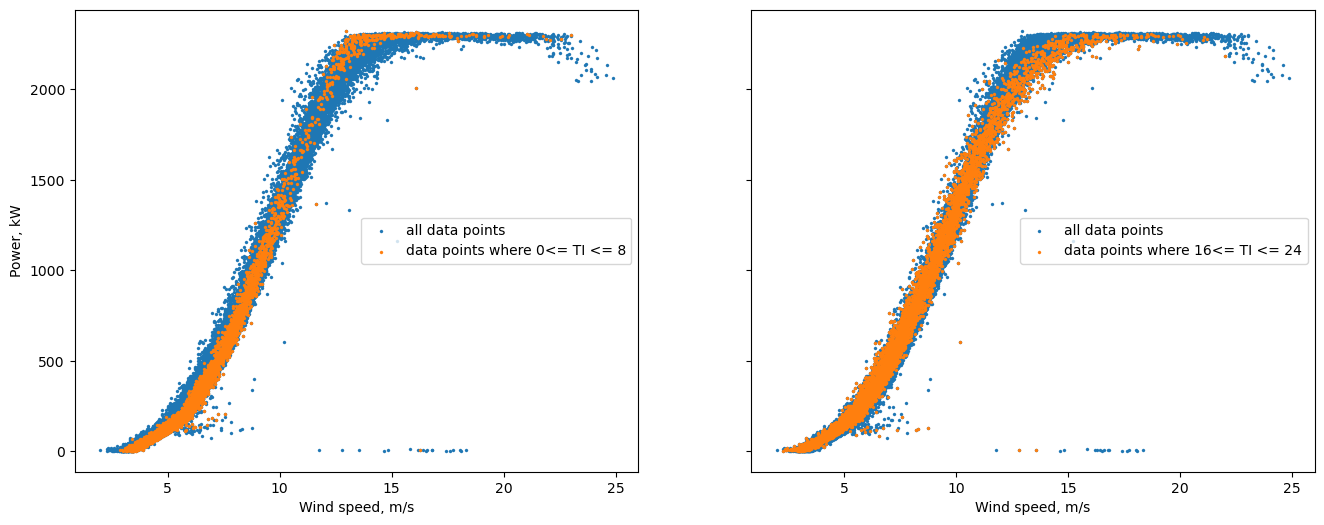

In [26]:
func.plot_TIeffect(df=data_clean, turbine_name= site + "_WTG01", ws_range1 = (0,8), ws_range2 = (16,24), figsize=(16,6))

### fit and save Standardscaler

In [27]:
from sklearn.preprocessing import StandardScaler
import pickle

In [28]:
# fit standardscaler and save it for later use (remove the mean and scale to unit variance)
scalerX = StandardScaler()
scalerX.fit(data_clean.iloc[:, 5:-1])
scalerY = StandardScaler()
scalerY.fit(data_clean.iloc[:, -1:])

StandardScaler()

In [29]:
# get parent directory
os.chdir("..")
directory = 'Data_clean'
scaler_nameX = site + "_scalerX.pkl"
scaler_nameY = site + "_scalerY.pkl"

# save 
pickle.dump(scalerX, open(os.path.join(os.getcwd(), directory, scaler_nameX),'wb'))
pickle.dump(scalerY, open(os.path.join(os.getcwd(), directory, scaler_nameY),'wb'))


### Sample data

In [30]:
# define sample size for pretraining (for a wind farm) 
# These pretraining samples are only used for neural networks. 
pretrain_size = 200000

# sample the data.
data_pretrain = data_clean.sample(pretrain_size, random_state = 64)

data_pretrain

,ts,Month,Day,Hour,instanceID,Wind_speed,TI,Temperature,Power
219213,2020-04-05 03:20:00,4,5,3,D_WTG14,8.110000,6.538508,7.842105,881.736842
612633,2020-09-22 21:30:00,9,22,21,D_WTG10,6.623000,18.486262,11.850000,378.950000
829068,2020-12-25 20:00:00,12,25,20,D_WTG13,9.413500,10.356363,4.000000,1243.200000
306012,2020-05-12 19:30:00,5,12,19,D_WTG13,6.731000,18.488715,3.000000,513.650000
449696,2020-07-14 04:20:00,7,14,4,D_WTG01,4.495500,7.425280,9.150000,91.550000
...,...,...,...,...,...,...,...,...,...
37040,2020-01-17 01:50:00,1,17,1,D_WTG01,5.966000,9.483065,4.000000,266.300000
637070,2020-10-03 12:00:00,10,3,12,D_WTG15,5.895263,10.338340,8.000000,268.157895
831686,2020-12-26 23:20:00,12,26,23,D_WTG07,13.299500,17.146197,4.000000,2107.000000
18402,2020-01-08 23:40:00,1,8,23,D_WTG03,5.601579,5.800747,3.894737,266.000000


In [31]:
# define sample size for training (for each turbine)
# For neural networks, these training samples are used for fine tuning. 
train_size = 10000

# sample the data. select equal number of training samples from each turbine. 
data_train = data_clean.groupby('instanceID', group_keys=False).apply(lambda x: x.sample(train_size, random_state = 22))

data_train

,ts,Month,Day,Hour,instanceID,Wind_speed,TI,Temperature,Power
752624,2020-11-22 15:50:00,11,22,15,D_WTG01,7.728500,9.772701,5.00,635.750000
365552,2020-06-07 15:50:00,6,7,15,D_WTG01,3.878421,15.401817,14.00,41.947368
44048,2020-01-20 02:50:00,1,20,2,D_WTG01,7.601500,13.716585,3.00,637.500000
352,2020-01-01 03:40:00,1,1,3,D_WTG01,5.260500,9.181947,3.00,169.000000
55152,2020-01-24 22:30:00,1,24,22,D_WTG01,6.201500,10.850341,4.00,321.050000
...,...,...,...,...,...,...,...,...,...
370111,2020-06-09 15:10:00,6,9,15,D_WTG16,5.148500,18.870378,12.10,184.550000
530175,2020-08-18 02:30:00,8,18,2,D_WTG16,6.083000,5.400515,15.00,270.800000
133583,2020-02-27 23:20:00,2,27,23,D_WTG16,5.184500,23.806786,2.95,238.200000
200511,2020-03-28 00:30:00,3,28,0,D_WTG16,5.470500,19.256211,5.00,242.900000


### Export data

In [32]:
file_name_clean = site + "_data_clean.csv"
file_name_pretrain = site + "_data_pretrain.csv"
file_name_train = site + "_data_train.csv"

# save 
data_clean.to_csv(os.path.join(os.getcwd(), directory, file_name_clean))
data_pretrain.to_csv(os.path.join(os.getcwd(), directory, file_name_pretrain))
data_train.to_csv(os.path.join(os.getcwd(), directory, file_name_train))

# reset to current directory
fd = sys.path[0]
os.chdir(fd)